
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [3]:
import keras
from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 
import os

In [10]:
# 檢查Dataset 的描述與資訊
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 37s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [17]:

save_dir = os.path.join(os.path.realpath('../'), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [20]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [29]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)



In [30]:
# 第三步：編譯, 
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [39]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
#max_features = 5000
batch_size_list = [32,64]
#kernel_size = 3
#hidden_dims = 250
epochs_list = [10]

In [40]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
history_list = []
for epochs in epochs_list:
    for batch_size in batch_size_list:
    
        history = model.fit(x_train,y_train ,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
        history_list.append(history)


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
 - 9s - loss: 0.1746 - acc: 0.9318 - val_loss: 0.1639 - val_acc: 0.9360
Epoch 2/10
 - 9s - loss: 0.1690 - acc: 0.9337 - val_loss: 0.1582 - val_acc: 0.9382
Epoch 3/10
 - 9s - loss: 0.1638 - acc: 0.9355 - val_loss: 0.1501 - val_acc: 0.9413
Epoch 4/10
 - 9s - loss: 0.1570 - acc: 0.9382 - val_loss: 0.1489 - val_acc: 0.9415
Epoch 5/10
 - 9s - loss: 0.1523 - acc: 0.9402 - val_loss: 0.1430 - val_acc: 0.9434
Epoch 6/10
 - 9s - loss: 0.1479 - acc: 0.9416 - val_loss: 0.1371 - val_acc: 0.9463
Epoch 7/10
 - 9s - loss: 0.1446 - acc: 0.9431 - val_loss: 0.1353 - val_acc: 0.9469
Epoch 8/10
 - 9s - loss: 0.1400 - acc: 0.9450 - val_loss: 0.1331 - val_acc: 0.9478
Epoch 9/10
 - 9s - loss: 0.1352 - acc: 0.9468 - val_loss: 0.1277 - val_acc: 0.9503
Epoch 10/10
 - 9s - loss: 0.1322 - acc: 0.9481 - val_loss: 0.1302 - val_acc: 0.9491
Train on 35000 samples, validate on 15000 samples
Epoch 1/10
 - 6s - loss: 0.1242 - acc: 0.9511 - val_loss: 0.1214 - va

In [43]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores[0])
result = model.predict(x_test,batch_size=200,verbose= 0)

print ( "" )
print ( " The accuracy of the model is %f " % ( scores[1]))

 test set 

 The test loss is %f  0.11383990123867989

 The accuracy of the model is 0.955840 


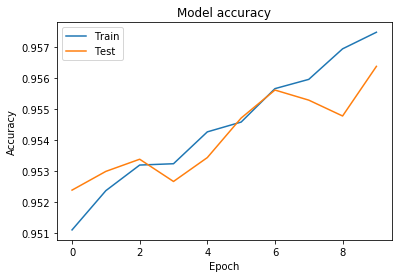

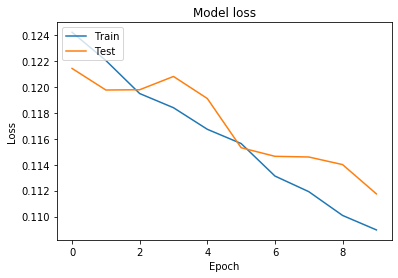

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()